<a href="https://colab.research.google.com/github/vishnupm-22/Movie_Recommendation_System/blob/main/project_02_Movie_Recommender_syatem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DATA GATHERING**
* Opening a local csv file using pandas 'read_csv' function

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/Data_sets/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/drive/MyDrive/Data_sets/tmdb_5000_credits.csv')

The movies dataset has the following features:-

* budget - The budget in which the movie was made.


* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
*overview - A brief description of the movie.
*popularity - A numeric quantity specifying the movie popularity.
*production_companies - The production house of the movie.
*production_countries - The country in which it was produced.
*release_date - The date on which it was released.
*revenue - The worldwide revenue generated by the movie.
*runtime - The running time of the movie in minutes.
*status - "Released" or "Rumored".
*tagline - Movie's tagline.
*title - Title of the movie.
*vote_average - average ratings the movie recieved.
*vote_count - the count of votes recieved

In [ ]:
movies.shape

(4803, 20)

The credits dataset contains the following features:-

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.

In [ ]:
credits.shape

(4803, 4)

Merging two dataframes

In [ ]:
movies = movies.merge(credits, right_on=['movie_id', 'title'], left_on=['id', 'title'])

In [ ]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [ ]:
movies.shape

(4803, 23)

In [ ]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

**Creating Tags:** helps in categorizing and represent the characteristics of each movie, making it easier for the recommendation system to analyze and suggest similar movies to users.
* genre
* id
* keywords
* title
* overview
* cast
* crew

In [ ]:
# movies=movies[['movie_id','title','genres','overview','keywords','cast','crew']]

Checking for missing data

In [ ]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

checking for duplicates

In [ ]:
movies=movies[['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew']]

In [ ]:
movies.duplicated().sum()

0

In [ ]:
movies.dropna(inplace=True)


In [ ]:
movies.shape

(4799, 21)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   original_title        4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  release_date          4799 non-null   object 
 11  revenue               4799 non-null   int64  
 12  runtime               4799 non-null   float64
 13  spoken_languages      4799 non-null   object 
 14  status                4799 non-null   object 
 15  title                

## **EDA**

**Top Movies based on popularity**

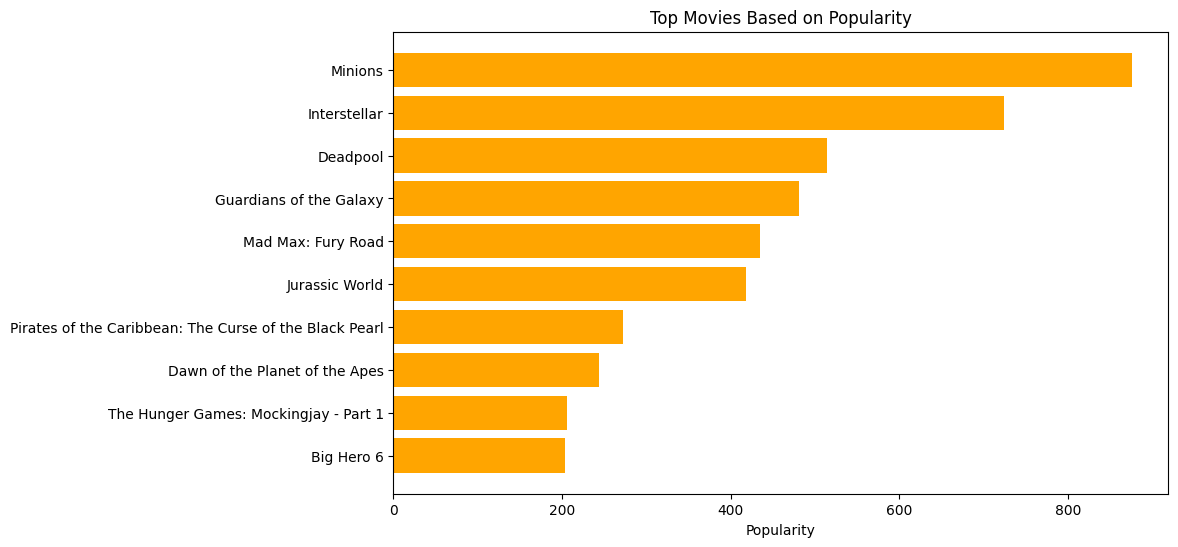

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Sort the DataFrame by 'popularity' in descending order to get the top movies
movies_sorted = movies.sort_values(by='popularity', ascending=False)

# Select the top N movies (adjust N based on how many top movies you want to display)
top_movies = movies_sorted.head(10)  # Change '10' to the desired number of top movies

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_movies['title'], top_movies['popularity'], color='orange')
plt.xlabel('Popularity')
plt.title('Top Movies Based on Popularity')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest popularity at the top
plt.show()


**Top Blockbuster Movies and flop movies based profit/loss**

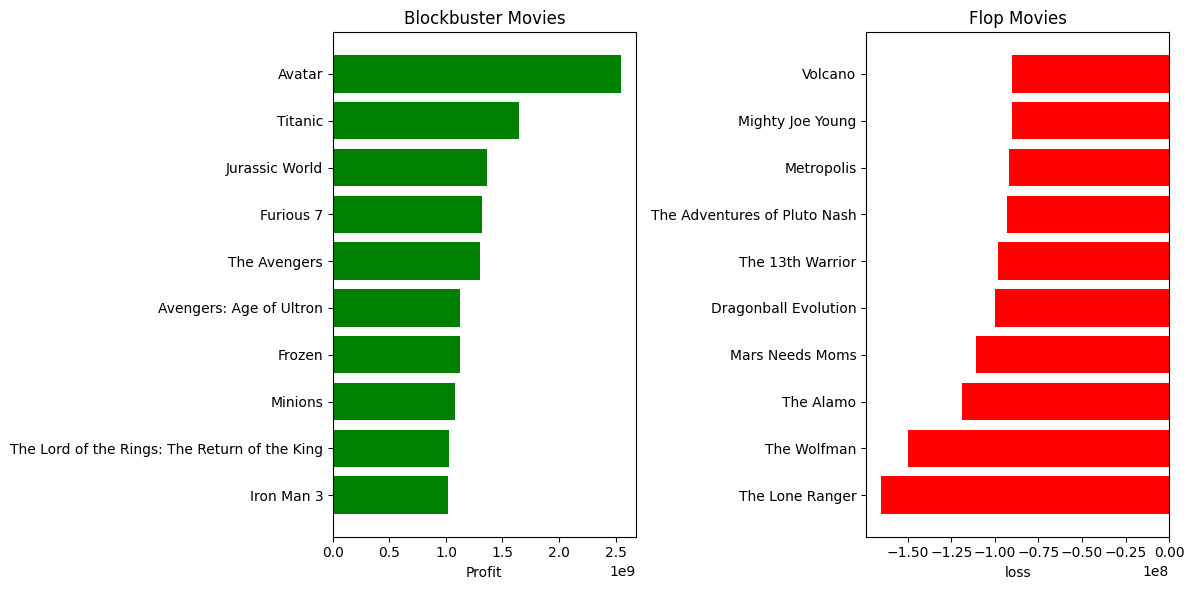

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Create a new column 'profit' by subtracting 'budget' from 'revenue'
movies['profit'] = movies['revenue'] - movies['budget']

# Sort the DataFrame by 'profit' to get the top movies
movies_sorted = movies.sort_values(by='profit', ascending=False)

# Select the top N movies with highest profit and lowest profit
top_blockbusters = movies_sorted.head(10)  # Change '10' to the desired number of top blockbuster movies
top_flops = movies_sorted.tail(10)  # Change '10' to the desired number of top flop movies

# Create a bar plot for blockbuster movies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(top_blockbusters['title'], top_blockbusters['profit'], color='green')
plt.xlabel('Profit')
plt.title('Blockbuster Movies')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest profit at the top

# Create a bar plot for flop movies
plt.subplot(1, 2, 2)
plt.barh(top_flops['title'], top_flops['profit'], color='red')
plt.xlabel('loss')
plt.title('Flop Movies')
plt.gca().invert_yaxis()  # Invert y-axis to have the lowest profit at the top

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Top movies based on imdb rating**

                         title  imdb_rating
1881  The Shawshank Redemption     8.238641
662                 Fight Club     8.088167
3232              Pulp Fiction     8.066036
3337             The Godfather     8.065485
65             The Dark Knight     8.038039
809               Forrest Gump     7.964107
96                   Inception     7.964031
95                Interstellar     7.930976
1990   The Empire Strikes Back     7.893878
1818          Schindler's List     7.886074


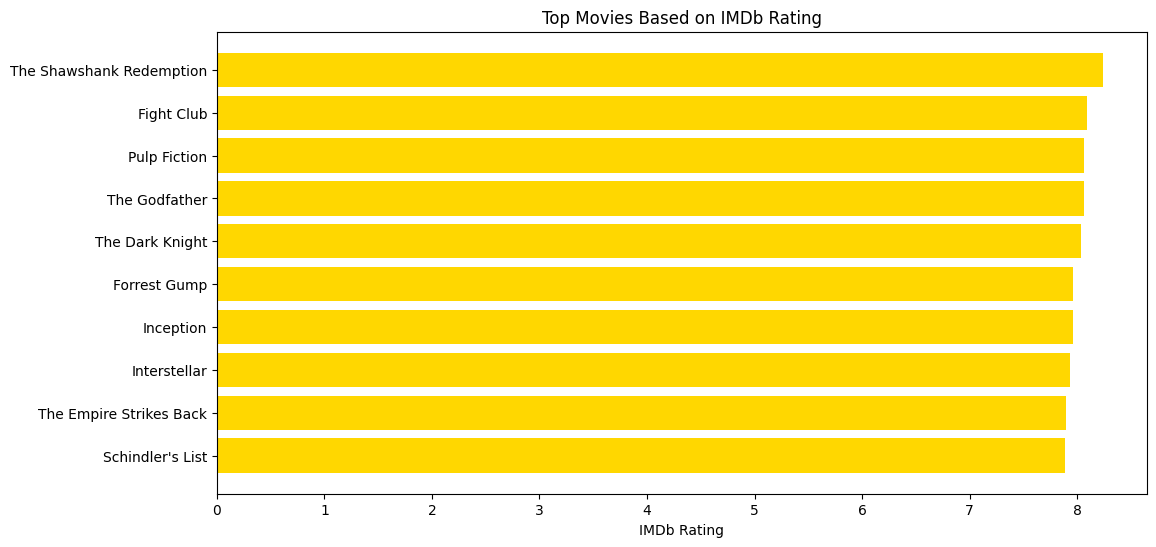

In [ ]:
import pandas as pd
min_votes_required = 1000  # Adjust this value based on your preference
average_overall_rating = movies['vote_average'].mean()

# Calculate IMDb-like rating
movies['imdb_rating'] = ((movies['vote_average'] * movies['vote_count']) / (movies['vote_count'] + min_votes_required) +
                     (min_votes_required / (movies['vote_count'] + min_votes_required)) * average_overall_rating)

# Sort the DataFrame by 'imdb_rating' to get the top movies
movies_sorted = movies.sort_values(by='imdb_rating', ascending=False)

# Select the top N movies
top_movies =movies_sorted.head(10)
# Display the top movies
print(top_movies[['title', 'imdb_rating']])

plt.figure(figsize=(12, 6))
plt.barh(top_movies['title'], top_movies['imdb_rating'], color='gold')
plt.xlabel('IMDb Rating')
plt.title('Top Movies Based on IMDb Rating')
plt.gca().invert_yaxis()
plt.show()


**Distribution of Movies by IMDb Rating Category**

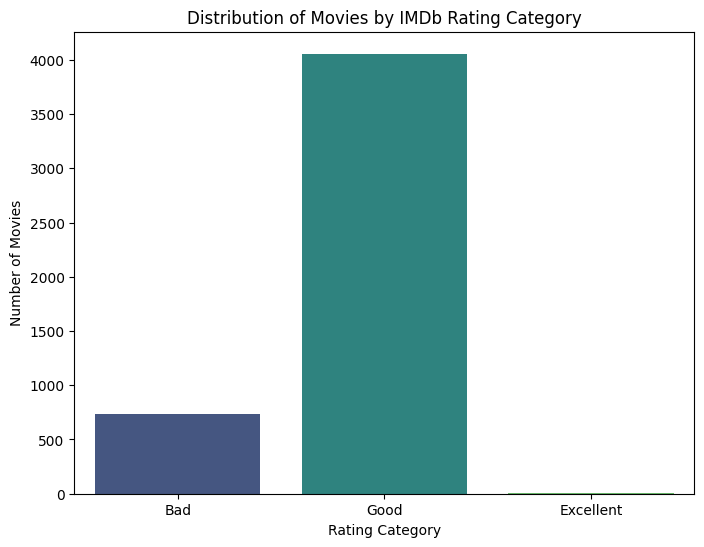

In [ ]:
import seaborn as sns
# Define rating categories
excellent_threshold = 8.0
good_threshold = 6.0

# Categorize movies based on IMDb-like rating
movies['rating_category'] = pd.cut(movies['imdb_rating'], bins=[float('-inf'), good_threshold, excellent_threshold, float('inf')],
                               labels=['Bad', 'Good', 'Excellent'])

# Create a count plot for movie categories
plt.figure(figsize=(8, 6))
sns.countplot(x='rating_category', data=movies, palette='viridis')
plt.xlabel('Rating Category')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by IMDb Rating Category')
plt.show()


**Count Plot for Range of Votes**

([0, 1, 2, 3],
 [Text(0, 0, 'bad(<2000)'),
  Text(1, 0, 'average(3000,5000)'),
  Text(2, 0, 'good(5000,9000)'),
  Text(3, 0, 'excellent(>9000)')])

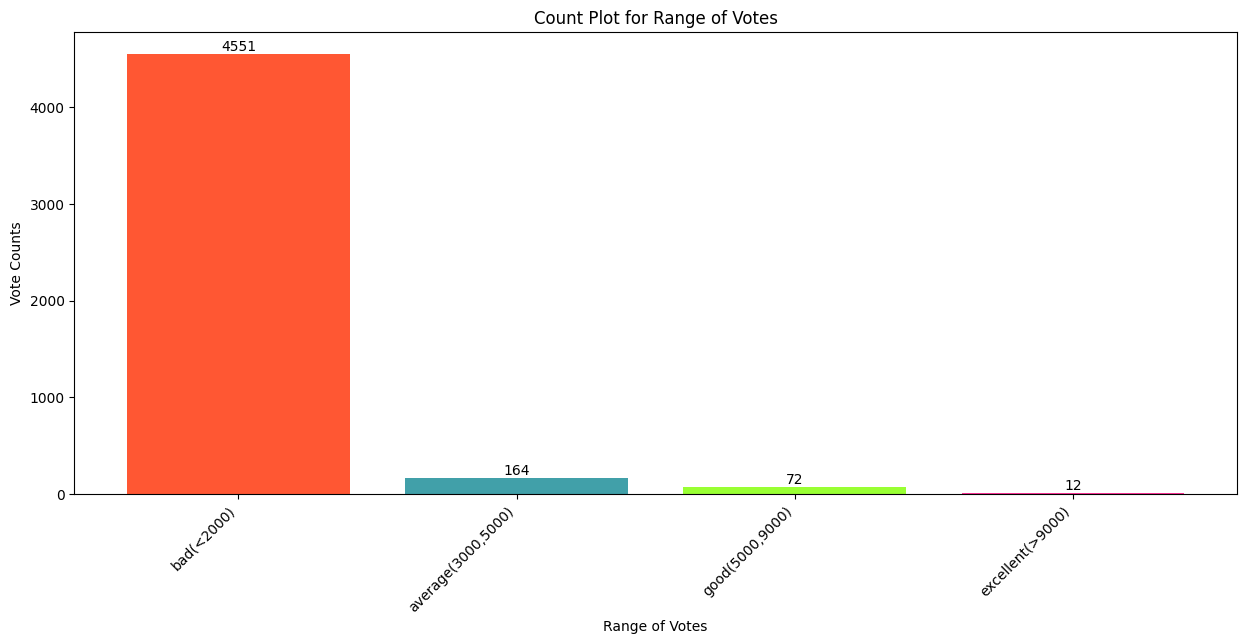

In [ ]:
bad = 0
less = 0
average = 0
good = 0
excellent = 0
votes = movies['vote_count']
votes = votes.values
for i in range(len(votes)):
  if votes[i]>=9000:
    excellent +=1
  elif (votes[i]<9000) and (votes[i]>=5000):
    good +=1
  elif votes[i]<5000 and votes[i]>=3000:
    average +=1
  else:
    bad +=1
vote_count_groups={'bad(<2000)':bad,'average(3000,5000)':average,'good(5000,9000)':good,'excellent(>9000)':excellent}
vote_categories = list(vote_count_groups.keys())
vote_categories_count = list(vote_count_groups.values())
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))
bars = plt.bar(vote_categories, vote_categories_count,color=["#FF5733", "#41A0A9", "#99FF33", "#FF3399", "#4D4D4D"])
#  ['b', 'g', 'r', 'c', 'm'])
for bar, count in zip(bars, vote_categories_count):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, count, ha='center', va='bottom')
plt.xlabel('Range of Votes')
plt.ylabel('Vote Counts')
plt.title('Count Plot for Range of Votes')
plt.xticks(rotation=45, ha='right')

Count Plot for number of Profit and loss movies

([0, 1, 2], [Text(0, 0, 'profit'), Text(1, 0, 'loss'), Text(2, 0, 'nothing')])

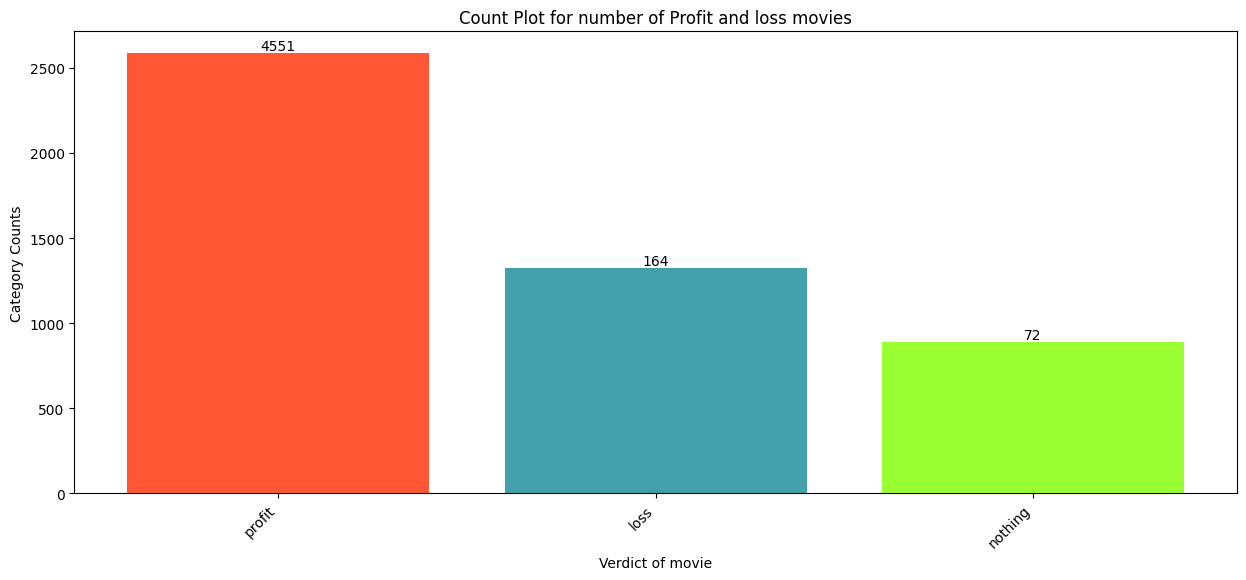

In [ ]:
profit_loss = (movies['revenue'] - movies['budget']).values
profit = 0
loss = 0
nothing = 0
for i in profit_loss:
  if i>0:
    profit+=1
  elif i<0:
    loss+=1
  else:
    nothing +=1

verdict = {'profit':profit,'loss':loss,'nothing':nothing}
verdict_categories = list(verdict.keys())
verdict_categories_count = list(verdict.values())
plt.figure(figsize=(15, 6))
bars = plt.bar(verdict_categories, verdict_categories_count,color=["#FF5733", "#41A0A9", "#99FF33", "#FF3399", "#4D4D4D"])
#  ['b', 'g', 'r', 'c', 'm'])
for bar, count in zip(bars, vote_categories_count):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, count, ha='center', va='bottom')
plt.xlabel('Verdict of movie')
plt.ylabel('Category Counts')
plt.title('Count Plot for number of Profit and loss movies')
plt.xticks(rotation=45, ha='right')

Formatting the Genre feature

In [ ]:
import ast # Converting str of lst to list
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [ ]:
movies['genres']= movies['genres'].apply(lambda x : convert(x))

In [ ]:
movies.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,title,vote_average,vote_count,movie_id,cast,crew,profit,imdb_rating,rating_category
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087,7.113608,Good


In [ ]:
movies['genres'].value_counts()

[Drama]                                         369
[Comedy]                                        282
[Drama, Romance]                                164
[Comedy, Romance]                               144
[Comedy, Drama]                                 142
                                               ... 
[Adventure, Action, Comedy, Romance]              1
[Action, Fantasy, Science Fiction, Thriller]      1
[Science Fiction, Comedy, Adventure]              1
[Drama, Thriller, Horror]                         1
[Comedy, Drama, Romance, TV Movie]                1
Name: genres, Length: 1175, dtype: int64

which combination of genres are more ?


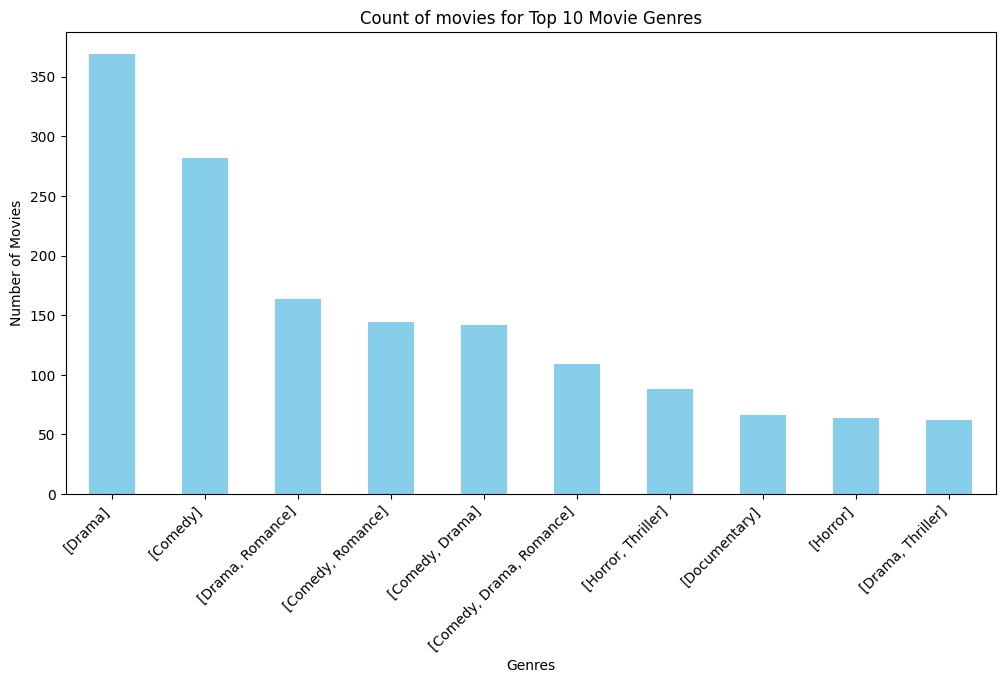

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the genres and count occurrences
top_genres = movies['genres'].value_counts().head(10)

# Plot the bar plot
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Count of movies for Top 10 Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.show()


Formatting keywords

In [ ]:
movies['keywords']= movies['keywords'].apply(lambda x : convert(x))

In [ ]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,title,vote_average,vote_count,movie_id,cast,crew,profit,imdb_rating,rating_category
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087,7.113608,Good
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",661000000,6.753488,Good
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,Released,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",635674609,6.262347,Good
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",834939099,7.450998,Good
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",24139100,6.098139,Good


Formatting cast

In [ ]:
def convert3(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [ ]:
movies['cast']=movies['cast'].apply(convert3)

In [ ]:
movies.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,title,vote_average,vote_count,movie_id,cast,crew,profit,imdb_rating,rating_category
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Avatar,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087,7.113608,Good


**Top 10 popular actors based on cast**

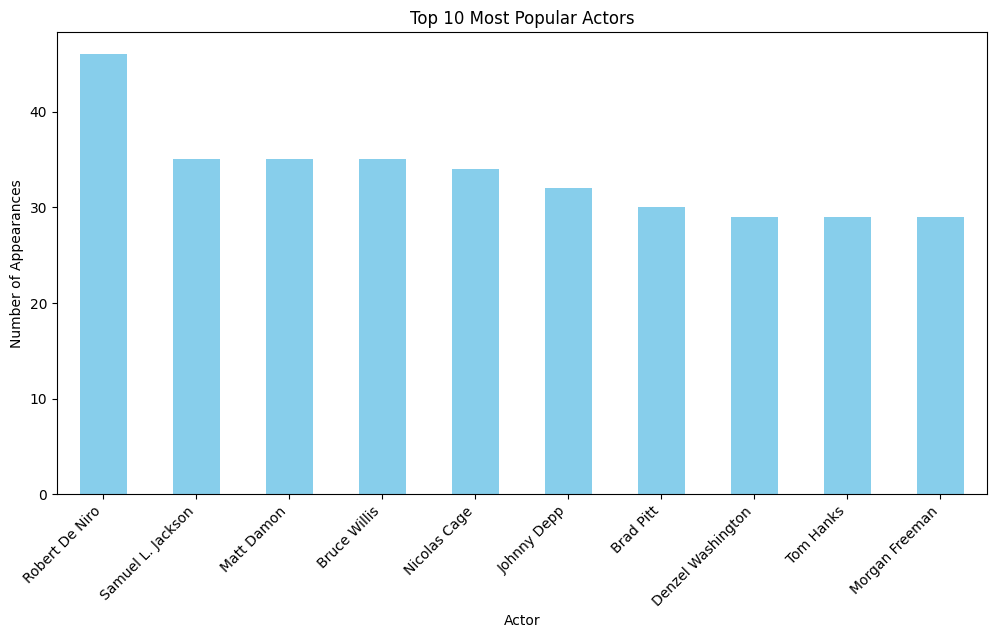

In [ ]:
actor_counts = pd.Series([actor for sublist in movies['cast'] for actor in sublist]).value_counts()

top_n_actors = actor_counts.head(10)  # Change '10' to the desired number of top actors

# Plot the bar plot
plt.figure(figsize=(12, 6))
top_n_actors.plot(kind='bar', color='skyblue')
plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.title('Top 10 Most Popular Actors')
plt.xticks(rotation=45, ha='right')
plt.show()



Formatting crew : Extraxting the name where value of job is director

In [ ]:
def fetch_director(obj):
    L = []

    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
            break
    return L

In [ ]:
movies['director'] = movies['crew'].apply(fetch_director)

In [ ]:
def fetch_writer(obj):
  l = []
  counter = 0
  for i in ast.literal_eval(obj):
    if i['job']=='Writer':
      l.append(i['name'])
  return l

In [ ]:
movies.sample(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,title,vote_average,vote_count,movie_id,cast,crew,profit,imdb_rating,rating_category,director
1941,25000000,"[Drama, Mystery, Thriller]",9729,"[sex, journalist, journalism, 1970s, entertain...",en,Where the Truth Lies,An ambitious reporter probes the reasons behin...,4.051221,"[{""name"": ""Serendipity Point Films"", ""id"": 805}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Where the Truth Lies,5.9,66,9729,"[Kevin Bacon, Colin Firth, Alison Lohman]","[{""credit_id"": ""52fe4523c3a36847f80be93b"", ""de...",-25000000,6.082163,Good,[Atom Egoyan]
2586,15000000,"[Fantasy, Drama, Horror, Action, Thriller]",11495,"[fire, telepathy, intelligence, college]",en,Firestarter,"As youths, Andy McGee (David Keith) and his fu...",11.379652,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Firestarter,5.9,173,11495,"[David Keith, Drew Barrymore, Freddie Jones]","[{""credit_id"": ""58c9f1e1c3a36841b6001b46"", ""de...",2080167,6.065547,Good,[Mark L. Lester]
4020,0,"[Comedy, Romance]",19316,"[lesbian relationship, lgbt, woman director]",en,Saving Face,A Chinese-American lesbian and her traditional...,2.487255,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Saving Face,6.8,32,19316,"[Michelle Krusiec, Joan Chen, Lynn Chen]","[{""credit_id"": ""5686e2ddc3a3683628008212"", ""de...",0,6.116072,Good,[Alice Wu]


In [ ]:
movies['writer'] = movies['crew'].apply(fetch_writer)

In [ ]:
def fetch_producer(obj):
  l = []
  counter = 0
  for i in ast.literal_eval(obj):
    if i['job']=='Producer':
      l.append(i['name'])
  return l

In [ ]:
movies['crew'] = movies['crew'].apply(fetch_producer)

In [ ]:
movies.sample(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_average,vote_count,movie_id,cast,crew,profit,imdb_rating,rating_category,director,writer
3493,0,[Drama],18602,"[independent film, woman director]",en,Morvern Callar,"Following her boyfriend's suicide, supermarket...",2.507912,"[{""name"": ""Company Pictures"", ""id"": 11842}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,7.2,34,18602,"[Samantha Morton, Kathleen McDermott, James Wi...","[Robyn Slovo, George Faber, Charles Pattinson]",0,6.130548,Good,[Lynne Ramsay],[]


Formatting Overview

In [ ]:
movies['overview']=movies['overview'].apply(lambda x: x.split())

removing spaces

In [ ]:
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])
movies['writer'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])
movies['producer'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [ ]:
movies.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_count,movie_id,cast,crew,profit,imdb_rating,rating_category,director,writer,producer
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,11800,19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver]","[JamesCameron, JonLandau]",2550965087,7.113608,Good,[James Cameron],"[JamesCameron, JonLandau]","[JamesCameron, JonLandau]"


creating tags

In [ ]:
movies['tags'] = movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['director']

In [ ]:
new_df = movies[['movie_id','title','tags']]

In [ ]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [ ]:
new_df['tags'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'James Cameron']

In [ ]:
# converting them to a str
new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))             # lst to str

<ipython-input-171-759924880406>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))             # lst to str


In [ ]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [ ]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver James Cameron'

In [ ]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


TEXT PREPROCESSING
* Lower casing
* Stemming

In [ ]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

<ipython-input-175-8b60b591a07f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [ ]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)


In [ ]:
new_df['tags'] =new_df['tags'].apply(stem)

<ipython-input-178-86aa2f4e15f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] =new_df['tags'].apply(stem)


In [ ]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [ ]:
new_df.sample(4)

,movie_id,title,tags
4533,172533,Drinking Buddies,"weekend trips, offic parties, late night conve..."
4391,66195,The Perfect Host,a crimin on the run con hi way into the wrong ...
3411,13919,The Chumscrubber,the chumscrubb is a dark comedi about the live...
4628,27420,Graduation Day,"after a high school track runner, name laura, ..."


**TEXT VECTORIZATION**

In [ ]:
new_df.shape

(4799, 3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [ ]:
vectors=cv.fit_transform(new_df['tags']).toarray()

### **MODEL**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity=cosine_similarity(vectors)

In [ ]:
len(similarity)

4799

In [ ]:
similarity[1].shape

(4799,)

In [ ]:
up_simi=[]
for i in range(len(similarity)):
  similarity[i].sort()
  up_simi.append(similarity[i][:5])

In [ ]:
def recommend(movie):
  movie_index = new_df[new_df['title']==movie].index[0]
  distances = up_simi[movie_index]
  movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])
  c=0
  for i in movies_list:
    c+=1
    print(f'{c}){new_df.iloc[i[0]].title}')
  # print(similarity.shape)

In [ ]:
recommend('Harry Potter and the Prisoner of Azkaban')


1)Avatar
2)Pirates of the Caribbean: At World's End
3)Spectre
4)The Dark Knight Rises
5)John Carter
